# Assignment 7

In this exercise you will implement a simple perceptron for handwritten digit recognition. What you need is to implement the pseudocode for the perceptron learning algorithm given in the lecture.

Test your function for at least one digit in the code cell at the end of this notebook. The learning curve should converge towards a high accuracy score (above 0.9).

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt

import numpy as np
from sklearn.datasets import load_digits

plt.style.use("ggplot")


def perceptron_train(X, Y, iterations=100, eta=0.1):
    """
    Trains a perceptron and returns the weights and learning curve as a vector of accuracies.

    Input:
    - X: Pixel matrix to encode the digits (every row is a gray-valued pixel vector for a number)
    - Y: Vector of true labels i.e. Y[0] is the label for the first digit in the dataset
    - iterations: Maximum number of allowed iterations. Defaults to 100.
    - eta: Learning rate for SGD. Defaults to 0.1.

    Output:
    - weights: The parameters of the linear decision boundary.
    - acc: Vector of accuracies for every iteration step.
    """

    acc = np.zeros(iterations)
    # initialize weight vector
    weights = np.random.randn(X.shape[1]) * 1e-5
    
    for it in np.arange(iterations):
        # indices of misclassified data
        wrong = (np.sign(X @ weights) != Y).nonzero()[0]
        if wrong.shape[0] > 0:
            # pick a random misclasssified data point, rand_ex = ...
            rand_ex = np.random.choice(wrong)
            
            # update weight vector, weights += ...
            weights += eta/(it+1) * Y[rand_ex] * X[rand_ex, :]
            
            # compute accuracy
            acc[it] = np.sum(np.sign(X @ weights) == Y) / X.shape[0]

    # Return weight vector and accuracy
    return weights, acc

In [47]:
# The following code is for testing purposes
# Your plots may differ slightly, but they should always converge towards a high accuracy very fast.


def assignment_07(digit_to_recognize=7):  # You can pick any other one from 0 to 9
    # Load the usps digits dataset from sklearn repository
    X, Y = load_digits(n_class=10, return_X_y=True)

    # Plot one example of the chosen digit
    for i in range(len(X)):
        if Y[i] == digit_to_recognize:
            plt.matshow(X[i, :].reshape(8, 8))
            plt.xticks([])
            plt.yticks([])
            plt.title(Y[i])
            plt.savefig("usps_example.png")
            break

    # Transform the 10-class labels into binary form
    y = np.sign((Y == digit_to_recognize) * 1.0 - 0.5)
    _, acc = perceptron_train(X, y)
    plt.figure(figsize=[12, 4])
    plt.plot(acc)
    plt.xlabel("Iterations")
    plt.ylabel("Accuracy")
    plt.savefig("learning_curve.png")

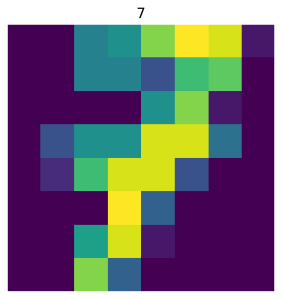

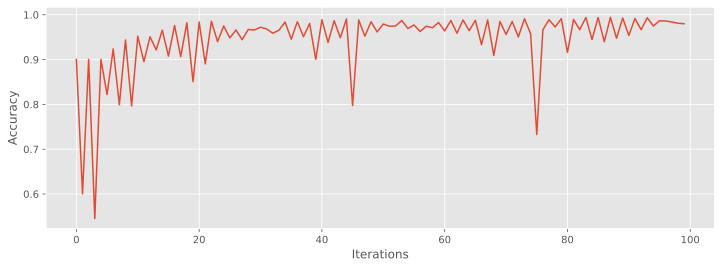

In [48]:
assignment_07()